<a href="https://colab.research.google.com/github/pramodgangula19/5731_Spring24/blob/main/gangula_pramod_assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here
# Write your code here
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import pandas as pd

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

def count_ngrams(tokens, n):
    n_grams = get_ngrams(tokens, n)
    return Counter(n_grams)

def calculate_bigram_probabilities(tokens):
    bigrams = get_ngrams(tokens, 2)
    unigrams = tokens
    bigram_counts = Counter(bigrams)
    unigram_counts = Counter(unigrams)

    probabilities = {}

    for bigram in bigram_counts:
        w1, w2 = bigram
        probability = bigram_counts[bigram] / unigram_counts[w1]
        probabilities[bigram] = probability

    return probabilities

def extract_noun_phrases(text):
    # You can use a more sophisticated approach for noun phrase extraction
    # For simplicity, we'll use a basic method here.
    tokens = word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)

    # Extracting noun phrases using a simple rule
    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    tree = cp.parse(tagged_tokens)

    noun_phrases = []
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            noun_phrases.append(' '.join(word for word, tag in subtree.leaves()))

    return noun_phrases

def calculate_relative_probabilities(dataset):
    all_noun_phrases = []
    review_noun_phrases = []

    for review in dataset:
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrases.append(Counter(noun_phrases))
        all_noun_phrases.extend(noun_phrases)

    max_freq = Counter(all_noun_phrases)

    relative_probabilities = []
    for review_noun_phrase_count in review_noun_phrases:
        relative_probabilities.append({
            np: review_noun_phrase_count[np] / max_freq[np] if max_freq[np] != 0 else 0
            for np in review_noun_phrase_count
        })

    return relative_probabilities

# Upload the dataset.txt file to your Colab environment

# Read the dataset from a file
with open('data.csv', 'r', encoding='utf-8') as file:
    dataset = file.readlines()

# Tokenize the dataset
tokenized_dataset = [word_tokenize(review) for review in dataset]

# Count the frequency of all the N-grams (N=3)
trigram_counts = count_ngrams([tuple(review) for review in tokenized_dataset], 3)
print("Trigram Frequencies:")
print(trigram_counts)

# Calculate the probabilities for all the bigrams
bigram_probabilities = calculate_bigram_probabilities([word for review in tokenized_dataset for word in review])
print("\nBigram Probabilities:")
print(bigram_probabilities)

# Extract all the noun phrases and calculate relative probabilities
relative_probabilities = calculate_relative_probabilities(dataset)
df = pd.DataFrame(relative_probabilities)
df = df.fillna(0)  # Fill NaN values with 0 for better presentation
print("\nRelative Probabilities of Noun Phrases:")
print(df)












[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Trigram Frequencies:
Counter({(('``', 'I', 'have', 'watched', 'quite', 'a', 'few', 'documentaries', ',', 'news', 'segments', ',', 'and', 'Youtube', 'videos', 'about', 'this', 'cave', 'rescue', '.', 'It', "'s", 'a', 'huuuuge', 'operation', 'so', 'every', 'time', 'you', 'watch', 'a', 'new', 'video', 'you', 'see', 'something', 'totally', 'new', 'about', 'the', 'operation', '.', 'There', 'were', 'hundreds', 'of', 'people', 'directly', 'on', 'the', 'scene', ',', 'thousands', 'involved', ',', 'various', 'different', 'plans', 'being', 'checked', 'out', '.', 'It', "'s", 'just', 'enormous', '.', 'Elon', 'Musk', 'even', 'promised', 'he', 'would', 'build', 'a', 'mini', 'submarine', 'to', 'rescue', 'the', 'kids', 'and', 'called', 'one', 'of', 'the', 'rescuers', 'pedo', 'guy', 'for', 'doubting', 'him', 'on', 'Twitter', '.', 'Of', 'course', 'completely', 'insane', 'idea', 'because', 'it', "'s", 'very', 'narrow', 'cave', 'passages', ',', 'but', 'there', 'were', 'many', 'such', 'alternative', 'plans.S

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here

# Write your code here
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
   "The future depends on what you do today.",

"The future belongs to those who learn more skills and combine them in creative ways.",

"Your time is limited, don't waste it living someone else's life.",

"The only way to do great work is to love what you do.",

"The best way to predict the future is to create it."
]

# Sample query
query = "The best way to predict the future is to create it.."

# Combine documents and query for TF-IDF matrix calculation
all_texts = documents + [query]

#Build TF-IDF matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_texts)

#Calculate cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])

#Rank documents based on cosine similarity
document_scores = list(enumerate(cosine_similarities[0]))
sorted_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)

#Print the TF-IDF matrix
print("Terms\t", "\t".join(["Document " + str(i + 1) for i in range(len(documents))] + ["Query"]))
terms = vectorizer.get_feature_names_out()
for i in range(len(terms)):
    print(terms[i], end="\t")
    for j in range(len(all_texts)):
        print(f"{tfidf_matrix[j, i]:.4f}", end="\t")
    print()

#Print the ranked documents
print("\nQuery:", query)
print("\nRanked Documents:")
for index, score in sorted_documents:
    print(f"Document {index + 1}: Similarity Score = {score:.4f}")
    print(f"   {documents[index]}")
    print()
















Terms	 Document 1	Document 2	Document 3	Document 4	Document 5	Query
and	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
belongs	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
best	0.0000	0.0000	0.0000	0.0000	0.3310	0.3310	
combine	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
create	0.0000	0.0000	0.0000	0.0000	0.3310	0.3310	
creative	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
depends	0.4214	0.0000	0.0000	0.0000	0.0000	0.0000	
do	0.3455	0.0000	0.0000	0.5053	0.0000	0.0000	
don	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
else	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
future	0.2500	0.1648	0.0000	0.0000	0.2395	0.2395	
great	0.0000	0.0000	0.0000	0.3081	0.0000	0.0000	
in	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
is	0.0000	0.0000	0.1892	0.1828	0.2395	0.2395	
it	0.0000	0.0000	0.2208	0.0000	0.2795	0.2795	
learn	0.0000	0.2777	0.0000	0.0000	0.0000	0.0000	
life	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
limited	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
living	0.0000	0.0000	0.3189	0.0000	0.0000	0.0000	
love	0

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

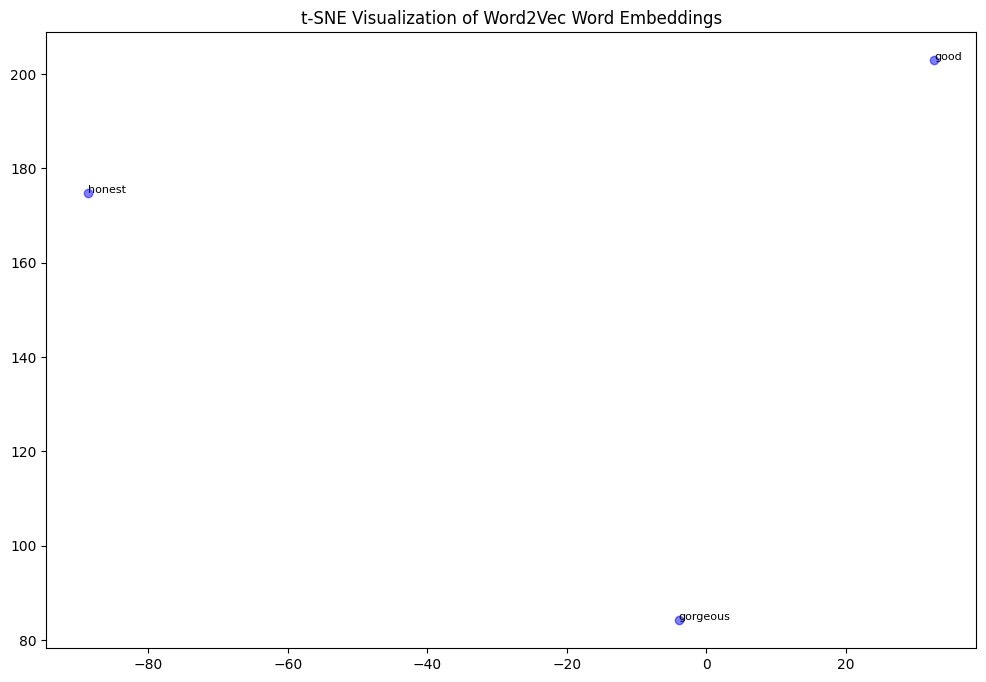

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load your Amazon reviews dataset
csv_path = "data.csv"
df = pd.read_csv(csv_path)

# Assuming the column name is 'Cleaned Review' (replace with the actual column name)
corpus = [str(review).split() for review in df['Cleaned_Review']]

# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=300, window=5, min_count=1, workers=4)
model.save("word2vec_model.bin")

# Visualize word embeddings using t-SNE with a safe perplexity value
def visualize_embeddings(model, words):
    vectors = np.array([model.wv[word] for word in words if word in model.wv])

    # Ensure perplexity is less than the number of samples
    perplexity = min(5, len(vectors)-1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    vectors_tsne = tsne.fit_transform(vectors)

    plt.figure(figsize=(12, 8))
    plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], marker='o', color='b', alpha=0.5)

    for i, word in enumerate(words):
        if i < len(vectors_tsne):  # Ensure we don't go out of bounds
            plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8)

    plt.title("t-SNE Visualization of Word2Vec Word Embeddings")
    plt.show()

# Choose words to visualize
words_to_visualize = ["good", "gorgeous", "honest", "product", "phone"]

# Visualize embeddings
visualize_embeddings(model, words_to_visualize)

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/pramodgangula19/5731_Spring24/blob/main/data.csv.xlsx


SyntaxError: invalid decimal literal (<ipython-input-6-57842d542969>, line 5)

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answerChallenging Aspects:

Data Preprocessing: People often find data cleaning and preprocessing challenging, especially when dealing with natural language data. Ensuring the data is clean, removing noise, and converting text into a format suitable for model training can be intricate.
Model Training: Training machine learning models, particularly Word2Vec, requires understanding hyperparameters, which can significantly affect the model's performance. Choosing the right parameters and interpreting the model's output might be challenging for some.
t-SNE Visualization: While t-SNE is a powerful tool for visualizing high-dimensional data, tuning its parameters (like perplexity) to get a meaningful visualization can be tricky. Understanding the balance between local and global aspects of the data in the visualization might require some experience.
Enjoyable Aspects:

Learning Opportunities: The process of working with natural language processing (NLP) and Word2Vec provides a great learning opportunity about word embeddings and their applications.
Creative Visualization: Visualizing data, especially in a spatial context using t-SNE, can be quite satisfying. It provides a tangible way to see and interpret complex relationships in the data.
Practical Application: Applying theoretical knowledge to a real-world dataset, like Amazon reviews, can be very rewarding. It offers a sense of accomplishment in seeing how data science techniques can extract insights from raw text.
Opinion on Provided Time:

The adequacy of time given for an assignment can vary based on an individual's background and experience level. For those new to NLP or Word2Vec, more time might be needed to understand the concepts and apply them effectively. For experienced individuals, the provided time might be sufficient. It's crucial that the time allocated allows for a deep understanding of the material, experimentation with the model, and thorough analysis of the results.
Assignments like this are valuable for developing hands-on experience with machine learning and NLP. They challenge individuals to apply theoretical knowledge in practical scenarios, enhancing their understanding and skills in the field.